In [1]:
import numpy as np
import matplotlib.pyplot as plt

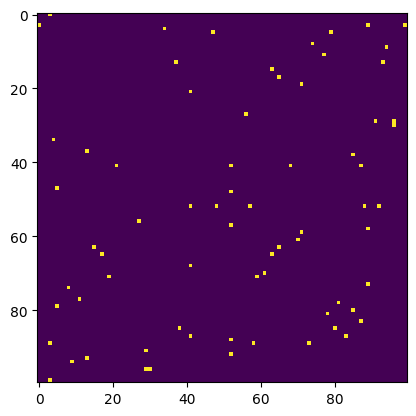

In [24]:
# create an erdos-renyi graph matrix
n = 100
p = .01
dt = 0.001
T = 1000

# Erdos Renyi
A = np.random.rand(n,n) # random matrix
A = np.where(A < p, 1, 0) # adjacency matrix
A = np.triu(A, 1) # triangular matrix
A = A + A.T # symmetric matrix

# # Small World
# A = np.zeros((n,n))
# for i in range(n):
#     for j in range(n):
#         if i == j:
#             continue
#         if np.abs(i-j) < 5:
#             A[i,j] = 1
#         elif np.abs(i-j) > n-5:
#             A[i,j] = 1
#         else:
#             A[i,j] = 0

# plot
plt.imshow(A)
plt.show()

In [27]:
# drift
mu = np.random.randn(n)

# diffusion
sigma = np.ones(n)

# initial conditions
x = np.zeros((T,n))

kp = np.zeros(n)
km = np.zeros(n)

# simulate
for t in range(T-1):
    x[t+1,:] = x[t,:] + mu*dt + np.sqrt(2*dt)*np.random.randn(n) + kp.dot(A) - km.dot(A)
    # set kick of other processes
    kp = x[t+1,:] < np.inf
    kp = x[t+1,:] > 1
    km = x[t+1,:] > -np.inf
    km = x[t+1,:] < -1
    x[t+1,:] = np.where(x[t+1,:] > 1, np.inf, x[t+1,:])
    x[t+1,:] = np.where(x[t+1,:] < -1, -np.inf, x[t+1,:])
    

print(x[-1,:])


[        inf         inf        -inf         inf         inf         inf
         inf         inf         inf        -inf         inf        -inf
        -inf        -inf        -inf        -inf         inf        -inf
 -0.07776615        -inf        -inf        -inf  0.13765966        -inf
        -inf         inf        -inf        -inf         inf         inf
         inf         inf        -inf        -inf         inf         inf
         inf        -inf         inf        -inf        -inf        -inf
        -inf         inf        -inf        -inf        -inf         inf
        -inf        -inf        -inf        -inf        -inf        -inf
         inf        -inf        -inf        -inf         inf        -inf
         inf        -inf        -inf        -inf        -inf        -inf
         inf        -inf        -inf  0.03513643        -inf        -inf
        -inf         inf         inf        -inf        -inf        -inf
        -inf         inf         inf        -inf   

In [22]:
print(x[100,:])

[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf]
